<a href="https://colab.research.google.com/github/pteroz/python_learn/blob/main/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Take photo from device probe

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


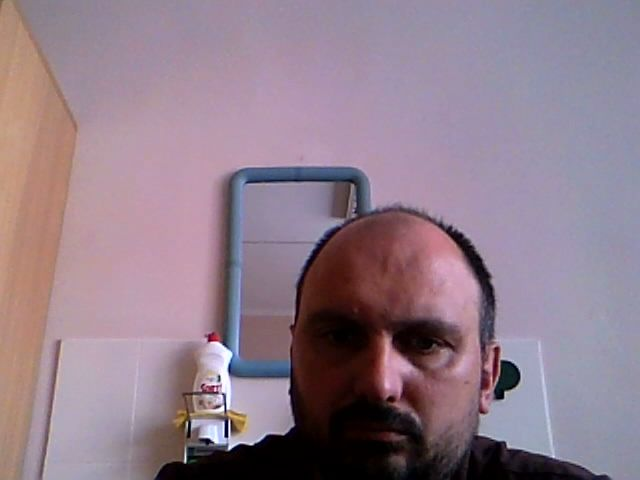

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Example form fields

In [ ]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 142  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---

In [ ]:
#@title Проба с формами { vertical-output: true }
#Попробуем соединиться с заметками


b = [7, 8, 9]
c = 'раз два три'.split()
dropdown = "2" #@param [1, 2, 3]
date = "2022-08-25" #@param { type: "date"}

#@markdown ---

#@markdown ![Alt text](https://aux.iconspalace.com/uploads/10511515931817530194.png)

#@markdown **_Enter hello_**
a = "\u043F\u0440\u0438\u0432\u0435\u0442, hot" #@param { type:"string" }
#@markdown ---
button = widgets.Button(description="Click!")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        print(dropdown, a)

button.on_click(on_button_clicked)
display(button, output)

Button(description='Click!', style=ButtonStyle())

Output()

# Widget probe

In [ ]:
import ipywidgets as widgets
from IPython.display import display

from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
button1 = widgets.Button(description="Click Нажми!",
                 button_style="success")

def on_button_clicked(b):
    print(dropdown1.value)

button1.on_click(on_button_clicked)

dropdown1 = widgets.Dropdown(
    options=[('One', 1), ('Two', 2)],
    value=2,
    description='Номер:',
)

combobox1 = widgets.Combobox(
    #value='Петр',
    options=['Оля', 'Петр'],
    description='Один член семьи?',
    ensure_option=True,
    disabled=False,
)


display(combobox1)
display(dropdown1)
display(button1)

Combobox(value='', description='Один член семьи?', ensure_option=True, options=('Оля', 'Петр'))

Dropdown(description='Номер:', index=1, options=(('One', 1), ('Two', 2)), value=2)

Button(button_style='success', description='Click Нажми!', style=ButtonStyle())

2
2


# Проба с импортом библиотеки

In [ ]:
#@title Проба с импортом библиотеки

import sys
sys.path.append('/content/drive/MyDrive/p_t_it/prog')

import mylib
mylib.myFunction()

'Hello, i am here!'

# Section night shift

In [ ]:
#@title Шаблон осмотра

class Patient():
    def __init__(self, **kwargs):
        self.surname = kwargs['surname'],
        self.name = kwargs['name'],
        self.patronymic = kwargs['patronymic'],
        self.date_of_birth = kwargs['date_of_birth']

patient = Patient(
    surname = "ssfas", #@param { type: "string" }
    name = "name", #@param {type: "string"}
    patronymic = "patronymic", #@param {type: "string"}
    date_of_birth = "2022-08-26", #@param {type: "date"}
)

import ipywidgets as widgets
from IPython.display import display

button = widgets.Button()


In [ ]:
dict_my = {'a': 'b',
           "c": 1}
dict_my['a']

'b'

In [ ]:
p = Patient(a = 'b')
p
p.date_of_birth


NameError: ignored

# Docx template

In [ ]:
!pip install docxtpl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 6.3 MB/s 
  Created wheel for docxcompose: filename=docxcompose-1.3.5-py3-none-any.whl size=22162 sha256=a82db1b94fbb1a9093b483b95d49ca6d65a68b64ab4e7c719b0d0fc97a50c9f3
  Stored in directory: /root/.cache/pip/wheels/c8/1e/26/2fb5a4e66d2e90f10f86e5b5821cb599b4ed8b168d07015553
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=3c832aa6419ec7951651226e91ed251dbb04e5e73042078a12ed293c21ccb339
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built docxcompose python-docx


In [ ]:
import docxtpl
path_dir = "/content/drive/MyDrive/p_t_it/prog/docx_tmpl/"
doc = docxtpl.DocxTemplate(path_dir + 'rkt_tmp.docx')
doc.get_undeclared_template_variables()
class RKT:
    address = '' #@param {type: "string"}
    allergic_reaction = '' #@param {type: "string"}
    birth_date = '' #@param {type: "date"}
    brief_history = '' #@param {type: "string"}
    card_number = '' #@param {type: "string"}
    clinical_status = '' #@param {type: "string"}
    department = '' #@param {type: "string"}
    diagnosis = '' #@param {type: "string"}
    doctor_fio = '' #@param {type: "string"}
    document_date = '2022-09-02' #@param {type: "date"}
    fio = '' #@param {type: "string"}
    hospital_name = '\u0423\u0417 \u041C\u043E\u043B\u043E\u0434\u0435\u0447\u043D\u0435\u043D\u0441\u043A\u0430\u044F \u0426\u0420\u0411, \u0411\u043E\u043B\u044C\u043D\u0438\u0446\u0430 \u21161' #@param ['УЗ Молодечненская ЦРБ, Больница №1'] {allow-input: true}
    patient_complaints = '' #@param {type: "string"}
    research_date = '' #@param {type: "date"}
    research_target = '' #@param {type: "string"}
    research_time = '' #@param {type: "string"}
    weight = '' #@param {type: "string"}
    yes_no = 'нет' #@param ['да', 'нет']

In [ ]:
!pip install docxtpl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.0 MB/s 
  Created wheel for docxcompose: filename=docxcompose-1.3.5-py3-none-any.whl size=22162 sha256=2ac6e24f4fae07faea7879d4102fcd1490c7eec0103c88e4c3b93c95f67b4442
  Stored in directory: /root/.cache/pip/wheels/c8/1e/26/2fb5a4e66d2e90f10f86e5b5821cb599b4ed8b168d07015553
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=66a6c0498d9cef6467c16547fb1ec1df924d544b3b9a7806c9780ec1ddf7d4ac
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built docxcompose python-docx


In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True);
import docxtpl
path_dir = "/content/drive/MyDrive/p_t_it/prog/docx_tmpl/"
doc = docxtpl.DocxTemplate(path_dir + 'rkt_tmp.docx')
variables_from_doc = doc.get_undeclared_template_variables()
variables_from_doc;

Mounted at /content/drive/


In [ ]:
import glob
import ipywidgets as widgets
from IPython.display import display

#files_dropdown = widgets.Dropdown(
#    options=[i for i.split('/')[:-1] in docx_list]
#)
docx_list = glob.glob(path_dir + '*.docx')
#[i.split('/')[-1].split('') for i in docx_list]

In [ ]:
import ipywidgets as widgets
from IPython.display import display, update_display

import time

from google.colab import output
output.enable_custom_widget_manager()
display_list = []
variables_from_doc = list(variables_from_doc)
variables_from_doc.sort()

for item in variables_from_doc:
    item = item.split('_')
    item = ' '.join(item[1:]).capitalize()
    if 'дата' in item:
        widget_out = widgets.DatePicker(
        description=item,
        disabled=False,
        style= {'description_width': 'initial'},        
    )
    else:
        widget_out = widgets.Text(
            value='',
            placeholder='Type something',
            description=item,
            disabled=False,
            style= {'description_width': 'initial'},
            layout= {'width': 'auto'}
    )
    display(widget_out)


Text(value='', description='01 учреждение здравоохранения', layout=Layout(width='auto'), placeholder='Type som…

DatePicker(value=None, description='02 дата исследования', style=DescriptionStyle(description_width='initial')…

Text(value='', description='03 время исследования', layout=Layout(width='auto'), placeholder='Type something',…

Text(value='', description='04 фамилия имя отчество пациента', layout=Layout(width='auto'), placeholder='Type …

DatePicker(value=None, description='05 дата рождения пациента', style=DescriptionStyle(description_width='init…

Text(value='', description='06 адрес пациента', layout=Layout(width='auto'), placeholder='Type something', sty…

Text(value='', description='07 вес пациента', layout=Layout(width='auto'), placeholder='Type something', style…

Text(value='', description='08 отделение учреждения здравоохранения', layout=Layout(width='auto'), placeholder…

Text(value='', description='09 номер мед', layout=Layout(width='auto'), placeholder='Type something', style=De…

Text(value='', description='10 жалобы пациента', layout=Layout(width='auto'), placeholder='Type something', st…

Text(value='', description='11 краткий анамнез', layout=Layout(width='auto'), placeholder='Type something', st…

Text(value='', description='12 клинический статус', layout=Layout(width='auto'), placeholder='Type something',…

Text(value='', description='13 диагноз', layout=Layout(width='auto'), placeholder='Type something', style=Desc…

Text(value='', description='14 исследуемый орган', layout=Layout(width='auto'), placeholder='Type something', …

Text(value='', description='15 обоснование и задача исследованияt', layout=Layout(width='auto'), placeholder='…

Text(value='', description='16 противопоказания для введения йодсодеражих веществ', layout=Layout(width='auto'…

Text(value='', description='17 аллергические реакции на введение йодсодержащих веществ', layout=Layout(width='…

Text(value='', description='18 врач направивший пациента', layout=Layout(width='auto'), placeholder='Type some…

DatePicker(value=None, description='19 дата выдачи направления', style=DescriptionStyle(description_width='ini…

Text(value='', layout=Layout(width='auto'), placeholder='Type something', style=DescriptionStyle(description_w…

# Numpy Probe

In [ ]:
#your code
import numpy as np
n = input()
n = n.split(', ')
m = [float(i) for i in n]
print(m)
V1 = np.array(m)
V2 = np.array(V1[-2])
V3 = np.array(V1[::-1])
V4 = np.array(V1[0::3])
V5 = np.array([i for i in range(len(m))])

KeyboardInterrupt: ignored

In [ ]:
V1 = np.array((1, 2, 3, 4, 5))
V2 = np.array((5, 4, 3, 2, 1))

In [ ]:
V1 * V2

In [ ]:
print(V1 == V2)
print(V1)
print(V2)
print(V2 & V1)

## Векторы из данных

На вход подаётся 2 списка целых чисел (они представляют из себя вектора равной длины, т.е. с одинаковым количеством элементов).

Используя векторные операции создайте и сохраните:

в переменную V1 Numpy вектор с числами из 1 строки

в переменную V2 Numpy вектор с числами из 2 строки

в переменную V3 Numpy вектор с покоординатными суммами V1 и V2

в переменную V4 Numpy вектор с покоординатными произведениями каждого второго числа V1 на каждое второе число V2, развёрнутого в обратном порядке

Примечание. В этой задаче не нужно ничего выводить на печать. Только создать вектора.

Sample Input 1:

1, 2, 3, 4
10, 20, 30, 40

In [ ]:
import numpy as np
a = np.array([int(i) for i in input().split(', ')])
b = np.array([int(i) for i in input().split(', ')])
V1 = a
V2 = b
V3 = V1 + V2
V4 = V1[::2] * V2[::-1][::2]
print(V1, V2, V3, V4)

In [ ]:
V = np.array((1, -2, 3, -4, 5))
print(V)
a = V[V % 2 == 0]
print(a)

## Вектор по условию

На вход подаётся 2 набора целых чисел.

Создайте вектор V такой, что он будет содержать числа из 1 набора, делящиеся нацело на предпоследнее число из 2 набора и разделённые на это число.

Если таких чисел не найдётся, то вектор V будет пустым (т.е. не будет содержать элементов).

 

In [ ]:
import numpy as np
a = np.array([int(i) for i in input().split(', ')])
b = np.array([int(i) for i in input().split(', ')])
V = a[a % b[-2] == 0] / b[-2]

In [ ]:
V

## Площать треугольника

В этой задаче нам даны 3 переменные: A1, A2, A3. Каждая содержит вектор с 2 координатами соответствующей вершины треугольника.

Найдите площадь треугольника и выведите её на печать.

 

Если все 3 точки лежат на одной прямой, то площадь треугольника равна 0.

 

Ответ проверяется с точностью до 4 знака после запятой.

In [ ]:
import numpy as np
A1 = np.array((-1, 1))
A2 = np.array((2, 5))
A3 = np.array((5, -3))
a = np.sqrt(sum((A2-A1)**2))
b = np.sqrt(sum((A2-A3)**2))
c = np.sqrt(sum((A1-A3)**2))
p = (a + b + c) / 2
S = np.sqrt(p * (p - a) * (p - b) * (p - c))

In [ ]:
M1 = np.array((
    (1, 2, 3),
    (4, 5, 6)
))
M2 = np.array((
    (2)
))

In [ ]:
np.dot(M2, M1)

## Matrix operations

Переменная M1 содержит Numpy матрицу.

Произведите операции последовательно:

1. Замените значения в предпоследней строке на значения по формуле:

sin(x*pi/6), где x - старое значение

2. Замените значения в предпоследнем столбце на значения по формуле:

e**x

Примечание. Для ячейки на пересечении предпоследнего столбца и предпоследней строки значение ячейки будет изменено по формуле: 

 e**sin(x*pi/6)

Результат запишите в переменную M2

In [ ]:
kimport numpy as np
M1 = np.array((
    (1., 2., 3., 0.),
    (4., 5., 6., 0.),
    (0., 1., 1., 6.,),
    (7., 8., 9., 0.)
))

M1[-2] = M1[-2]*np.sin((M1[-2]*np.pi)/6)
M1[:,-2] = np.exp(M1[:,-2])
M2 = M1.copy()
M2

## numpy-100 (1-10)

In [ ]:
# 1. Выведите на печать версию модуля numpy
import numpy as np
np.version.version

In [ ]:
# 2. Считайте число n
# Создайте в переменной Z Numpy вектор из нулей длины n.
import numpy as np
n = int(
    input()
)
Z = np.zeros(n)
print(Z)

In [ ]:
# 3. Считайте строку, где значения заданы через пробел shape и dtype
# Последнее значение в строке может быть либо числом (тогда это последнее значение кортежа shape, либо строкой dtype)
# shape - атрибут, задающий размеры матрицы нолей (позволяет вернуть вектор-строку, вектор-столбец, матрицу, куб и т.д.)
# dtype - тип данных, использующихся для значений матрицы. По-умолчанию используется numpy.float64.
# Создайте матрицу Z размера shape, со значениями типа dtype (если dtype не указан, используйте numpy.float64)

import numpy as np
n = input().split()
if len(n) == 1 or str.isdigit(n[-1]):
    dtype = np.float64
    shape = [int(i) for i in n]
else:
    dtype = n[-1]
    shape = [int(i) for i in n[:-1]]
Z = np.zeros(shape, dtype=dtype)
Z

In [ ]:
# 4. Посчитайте размер матрицы Z в байтах и выведите его на печать.

import numpy as np

Z = np.zeros((10, 10))
Z.itemsize * np.prod(Z.shape)

In [ ]:
# 5. Выведите на печать встроенную документацию для функции add numpy, а потом объекта numpy.array.

import numpy as np

print(np.add.__doc__)
print(np.array.__doc__)

In [ ]:
# 6. Считайте 2 числа:
# n - размер Numpy вектора
# x - координата элемента вектора, который должен быть равен 1. Остальные элементы вектора должны быть равны 0.
# Сохраните вектор в переменную Z.

import numpy as np

n = int(input())
x = int(input())
Z = np.zeros(n)
Z[x] = 1
Z

In [ ]:
# 7. Считайте 2 числа n, m.
# Создайте вектор Z состоящий из чисел от n до m с шагом 1.
import numpy as np

n,m = [int(input()) for i in range(2)]
# Z = np.array([i for i in range(n,m+1,1)])
np.arange(n, m+1, 1)

In [ ]:
# 8. Дан вектор Z
# "Разверните" его.

import numpy as np

# Z = np.array([1, 2, 3, 4])

Z = np.flip(Z, 0)

In [ ]:
# 9. Считайте 3 числа:
# n - количество элементов матрицы
# m и k - размеры матрицы (число строк и столбцов соответственно)
# Заполните матрицу Z числами от 0 до n-1 по порядку (сперва строки, потом столбцы).
# Гарантируется, что m*k = n, т.е. все элементы "влезут" в матрицу и не останется пустых мест.

import numpy as np

n = int(input())
m,k = [int(i) for i in input().split()]

Z = np.arange(n).reshape(m, k)
Z

In [ ]:
# 10.1 Дан вектор Z
# Запишите в переменную NonZerros индексы ненулевых элементов.

import numpy as np

Z = np.array([1, 0, 2, 0, 3, 0, 4])
NonZerros = np.nonzero(Z)
NonZerros

In [ ]:
# 10.2 Дана матрица чисел Z (Z может быть 1, 2 или даже 3 мерной).
# Выведите на печать список чисел из этой матрицы, которые больше 3.
import numpy as np

Z = np.array([[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9],
          [0, 0, 9]])
print(list(Z[np.nonzero(Z > 3)]))
print(list(Z[Z > 3]))

## numpy-100 (11-20)

In [ ]:
# 11. Считайте число n

# Создайте единичную матрицу размера n, сохраните результат в переменную Z.
import numpy as np

n = int(input())
Z = np.eye(n)
Z

In [ ]:
# 12. Считайте 3 числа: n, m, l.

# Зафиксируйте значение генератора случайных чисел Numpy с помощью

#numpy.random.seed(42)
#Создайте матрицу n*m*l из случайных чисел (от 0 до 1) и сохраните результат в переменную Z.
import numpy as np
n, m, l = [int(i) for i in input().split()]
np.random.seed(42)
Z = np.random.random((n,m,l))
Z

In [ ]:
# 13. Считайте 2 числа: n, m
# Зафиксируйте значение генератора
# numpy.random.seed(42)
# создайте матрицу n*m из случайных чисел
# выведите значение минимального и максимального чисел в получившейся матрице

import numpy as np
np.random.seed(42)
n, m = [int(i) for i in (input().split())]
Z = np.random.random((n, m))
print(Z.min())
print(Z.max())

In [ ]:
# 14. Считайте 2 числа: n, m
# Зафиксируйте значение генератора
# numpy.random.seed(42)
# создайте матрицу n*m из случайных чисел
# выведите значение среднего для всей матрицы

import numpy as np
np.random.seed(42)
#n, m = [int(i) for i in (input().split())]
n, m = list(map(int, input().split()))
Z = np.random.random((n, m))
print(Z.mean())

In [ ]:
# 14.* Считайте 2 числа: n, m
# Зафиксируйте значение генератора
# numpy.random.seed(42)
# создайте матрицу n*m из случайных чисел
# найдите среднее значение для каждого из столбцов
# выведите на печать значение минимального и максимального среднего по столбцам (каждое с новой строки)

import numpy as np
np.random.seed(42)
#n, m = [int(i) for i in (input().split())]
n, m = list(map(int, input().split()))
Z = np.random.random((n, m))
print(Z.mean(axis=0).min())
print(Z.mean(axis=0).max())

In [ ]:
# 15. Считайте 2 числа: n, m
# Создайте матрицу размера n*m такую что
# На границе матрицы будет стоять 1
# Внутри матрицы будет стоять 0
# Сохраните матрицу в переменную Z

import numpy as np
n, m = tuple(map(int, input().split()))
'''
Z = np.zeros((n, m))
Z[0] = 1
Z[-1] = 1
Z[:,0] = 1
Z[:,-1] = 1
'''
Z = np.ones((n, m))
Z[1:-1,1:-1] = 0
Z

In [ ]:
# 16. Имеется матрица Z
# добавьте вокруг имеющейся матрицы "забор" из 0

import numpy as np
Z = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)
np.pad(Z, 1, constant_values=0)

In [ ]:
# 18.1 Считайте число n
# Создайте диагональную матрицу n*n. На главной диагонали должны быть числа от 1 до n
# Сохраните матрицу в переменную Z

import numpy as np
n = int(input())
Z = np.arange(1, n+1)
Z = np.diag(Z)
Z

In [ ]:
# 18.2 Считайте 2 числа:

# x - сдвиг для единственной ненулевой диагонали в матрице.
# k - верхняя граница для интервала чисел на диагонали (т.е. если k = 5, то на диагонали будут стоять числа 1, 2, 3, 4 и 5)
# Договоримся о значениях x:

# x = 0 - это главная диагональ матрицы
# x<0 - диагональ сдвигается вниз на |x| ячеек (если x = -1, то первая не нулевая ячейка будет с координатами (1,0))
# x>0 - диагональ сдвигается вправо на |x| ячеек (если x = 1, то первая ненулевая ячейка будет с координатами (0,1))

import numpy as np
x, k = tuple(map(int, input().split()))
Z = np.arange(1, k+1)
Z = np.diag(Z, k=x)
Z

In [ ]:
# 19 (21)


# Считайте 2 числа: n, m.
# Создайте матрицу размера n*m и "раскрасьте" её в шахматную раскраску.
# 0 - "чёрное"
# 1 - "белое"
# Ячейка с координатами (0, 0) всегда "чёрная" (т.е. элемент (0, 0) равен 0).
# Матрицу сохраните в переменную Z.

import numpy as np
n, m = tuple(map(int, input().split()))
# Z = np.tile((1.,0.),(n,m))
# Z[::2,:] = np.flip(Z[1], axis=0)
# Z = Z[:,:m]
Z = np.ones((n,m))
Z[0::2, 0::2] = 0
Z[1::2, 1::2] = 0
Z

In [ ]:
# 20
# Даны:

# индекс i
# numpy массив Z
# Определите "координаты" элемента с индексом i в Z и выведите кортеж с координатами на печать.

import numpy as np

i = 5
Z = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11]])
np.unravel_index(i, Z.shape, order='C')

## numpy-100 (22, 24-30)

In [ ]:
# 22. Переменная Y содержит исходную матрицу

# В переменную Z сохраните её "нормализованный" вид, 
# округлив каждое значение в матрице до 2 знака после запятой с помощью numpy.around.

import numpy as np

Y = np.array([[99, 11, 55],
              [33, 66, 99]])
Z = (Y - np.mean(Y))/np.std(Y)
np.around(Z, 2)

In [ ]:
# 24.1 Скалярное произведение векторов
# Переменные A и B содержат по numpy вектору. Найдите их скалярное произведение и сохраните в переменную Z.

# A и B могут содержать как int, так и float.

# Примечание. В этой задаче не нужно ничего выводить на печать. Только создать Z.

import numpy as np

A = np.array([1.5, 2.5, 3.5])
B = np.array([4, 5, 6])

np.dot(A, B)

In [ ]:
# 24.2 Умножение матриц
# Даны 2 матрицы: A и B.

# Найдите произведение матриц и сохраните его в переменную Z.

# Если найти произведение матриц невозможно, то запишите в Z строку:

# Упс! Что-то пошло не так...

import numpy as np
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
B = np.array([
    [11.5, 12.5, 13.5]
])
try:
    Z = np.dot(A, B)
except:
    Z = 'Упс! Что-то пошло не так...'

In [ ]:
# 25
# Поменяйте знак всех чисел из интервала (3; 9), хранящихся в векторе Z.
import numpy as np

Z = np.arange(11)
Z[(Z > 3) & (Z < 9)] *= -1
Z

In [ ]:
print(sum(range(5), -1))
from numpy import *
print(sum(range(5), -1))

In [ ]:
import numpy as np

Z = np.array([1, 2, 3, 4, 5, 6, 7])

2 << Z >> 2

Z**Z

1j*Z

Z/1/1

Z <- Z

In [ ]:
# 29
# Вектор A содержит float числа как больше, так и меньше нуля.

# Округлите их до целых и результат запишите в переменную Z. Округление должно быть "от нуля", т.е.:

# положительные числа округляем всегда вверх до целого
# отрицательные числа округляем всегда вниз до целого
# 0 остаётся 0

import numpy as np

A = np.array([-3.1, -5.9, 0, 2.2, 9.8])

#np.ceil(A[A<0])
a = A.copy()
A = np.absolute(A)
A = np.ceil(A)
Z = np.copysign(A, a)


In [ ]:
# 30
# Даны 2 вектора целых чисел A и B.

# Найдите числа, встречающиеся в обоих векторах и составьте их по возрастанию в вектор Z.

# Если пересечений нет, то вектор Z будет пустым.

import numpy as np
A = np.array([0, 9, 7, 1, 3, 7, 5, 2, 5, 1])
B = np.array([3, 1, 3, 7, 4, 1, 8, 1, 1, 8])
A = np.array([1, 2, 3, 4, 5])
B = np.array([-5, -4, -3])
np.intersect1d(A, B)

## numpy-100 (31-34, 37-40)

In [ ]:
# 31.
# # Suicide mode on
# В Numpy можно предусмотреть различное поведение в случае ошибок (а не только то, что мы наблюдали в задаче 28). Для этого используется функция https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.seterr.html

# Отключите вывод всех ошибок (это довольно опасное поведение)

import numpy as np

np.seterr(all='ignore')

In [ ]:
# 32.
# Что можно сказать о выражении
# np.sqrt(-1) == np.emath.sqrt(-1)

import numpy as np

np.sqrt(-1) == np.emath.sqrt(-1)

In [ ]:
# 33.
# Изучите работу с датами 
# (https://docs.scipy.org/doc/numpy-1.15.0/reference/arrays.datetime.html) 
# и выберите верные утверждения:

import numpy as np

np.datetime64('nat')
#np.datetime64('yesterday')
#np.datetime64('tomorrow')
np.datetime64('nat')-1

In [ ]:
# 34.
# 1-я входная строка - год (опционально месяц и день) в формате ISO начала отсчёта
# 2-я входная строка - год (опционально месяц и день) в формате ISO окончания отсчёта
# Составьте список (numpy array) дат с шагом в 1 день от начала до окончания отсчёта (последний день не включается).
# Результат должен представлять из себя список дат в формате ISO.
# Пример - 2005-02-25, где

# 2005 - год
# 02 - месяц
# 25 - день
# Запишите результат в переменную Z

import numpy as np

D1 = '2019'
D2 = '2019-01-09'
D1 = np.datetime64(D1, 'D')
D2 = np.datetime64(D2, 'D')
Z = np.arange(D1, D2)
Z

In [ ]:
# 36.
# Существует по крайней мере 5 способов получить из вектора случайных 
#float чисел вектор чисел только с целой частью:

# Целочисленное деление и векторные операции
# Округление "вниз"
# Округление "вверх" и вычет 1 (важно, что этот способ работает 
# только для "случайных" чисел. Если число УЖЕ целое, 
# то такая манипуляция приведёт к получению числа на 1 меньше исходного, т.е. ошибке)
# Приведение к целочисленному типу
# "Усечение" или округление в сторону нуля с помощью функции
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.trunc.html

import numpy as np

np.random.seed(42)
Z = np.random.uniform(0, 10, 10)
#1 целочисленное деление и векторные операции
# Z - Z%1

#2 округление "вниз"
# np.floor(Z)

#3 округление "вверх" и вычет 1
# np.ceil(Z)-1

#4 приведение к целочисленному типу
# Z.astype(int)

#5 "усечение" или округление в сторону нуля
np.trunc(Z)

In [ ]:
# 37.1
# На вход подаётся 2 строки:

# 1-я строка содержит 2 натуральных числа: n, m
# 2-я строка содержит число k
# Создайте матрицу размера n*m такую, что каждая её строка содержит числа от k до k+m-1 (с шагом 1).

# Ответ запишите в переменную Z

import numpy as np

n, m = tuple(map(int, input().split()))
k = int(input())
z = np.arange(k, k+m)
Z = np.tile(z, (n, 1))
Z = Z*1.
Z

In [ ]:
# 37.2
# На вход подаётся 2 строки:

# 1-я строка содержит 2 натуральных числа: n, m
# 2-я строка содержит число k
# Создайте матрицу размера n*m такую, что каждый её столбец содержит числа от k до k+n-1 (с шагом 1).

# Ответ запишите в переменную Z

import numpy as np

n, m = tuple(map(int, input().split()))
k = int(input())
z = np.arange(k, k+n)
Z = np.tile(z, (m, 1))
Z = np.rot90(Z, axes=(1,0))/1.
Z

In [ ]:
# 38
# Переменная V содержит итерируемый объект.

# Превратите его в одномерный numpy массив 
# и сохраните в переменную Z. 
# Массив будет содержать только числа типа float.

import numpy as np

V = map(np.sin, range(10))
V = {1:2, 3:4}

np.fromiter(V, dtype='float64')

In [ ]:
# 39.1 (деление отрезка на N+1 часть)
# На вход подаются 3 числа (каждое с новой строки):

# start
# stop
# n
# Составьте список (numpy.array) из n точек на отрезке (start, stop), попарно равноудалённых друг от друга и от концов отрезка (т.е. разделите отрезок на n+1 часть). Округлите значения точек до 3 знака после запятой.

# Результат сохраните в переменную Z.

import numpy as np

start = int(input())
stop = int(input())
n = int(input())

#Z = np.arange(start, stop, stop/(n+1)) #div by zero!
Z = np.linspace(start, stop, num=n+2)
Z = Z[1:-1]
np.around(Z, 3)

In [ ]:
# 39.2
# На вход подаются 3 числа (каждое с новой строки):

# start
# stop
# n
# Составьте список из n точек на отрезке [start, stop] в геометрической прогрессии, включая start и stop.

# Округлите значения точек до 3 знака после запятой.

# Результат сохраните в переменную Z.

import numpy as np

start, stop, n = [int(input()) for i in range(3)]

Z = np.geomspace(start, stop, num=n)
Z = np.around(Z, 3)
Z

In [ ]:
# Считайте 2 числа:

# seed
# n
# С помощью Numpy сгенерируйте n случайных чисел из интервала (0, 1) 
# с фиксированным seed (https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.seed.html), 
# отсортируйте их по возрастанию и сохраните в переменную Z.

import numpy as np

seed, n = [int(input()) for i in range(2)]

np.random.seed(seed)
Z = np.random.random(n)
Z = np.sort(Z)
Z

## pandas-100 (1-10)

In [ ]:
# 2. Выведите на печать версию модуля pandas

import pandas as pd

print(pd.__version__)

In [ ]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [ ]:
import pandas as pd
df = pd.DataFrame(data, labels)

# Переменная df содержит DataFrame.
# Переменная col содержит имя колонки
# Переменная row содержит имя ИЛИ индекс строки
# Выведите на печать содержимое ячейки
row = 'e'
col = 'animal'

print(df.at[row, col])
print(df.loc[row, cold])


In [ ]:
df.info()

In [ ]:
# 5.
# Переменная df содержит DataFrame.

# Выведите на печать:

# число непустых (не null) значений в колонке 'age'
# 75% квантиль для значений в колонке 'age'

import pandas as pd
import numpy as np


df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']})
index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df.age.count()
df.age.quantile(0.75)

In [ ]:
# 6.1
# Переменная df содержит DataFrame.

# Выведите на печать 3 первых строки.
import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

df.head(3)
df[:3]

In [ ]:
# 6.2
# Переменная df содержит DataFrame.

# Выведите на печать строки с индексами 0, 2, 3.

# Важно. Обратите внимание, что хотя у 1-ого Dataframe назначены произвольные строки в качестве индексов, 
# к ним тем не менее можно обратиться и по их порядковым значениям!

import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

df.iloc[[0, 2, 3]]



In [ ]:
# 7
# Переменная df содержит DataFrame.

# Выведите на печать только столбцы 'name' и 'age' (гарантируется, что они есть)

import numpy as np
import pandas as pd

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

df[['name','age']]
df.loc[:, ['name', 'age']]

In [ ]:
# 8
# Переменная df содержит DataFrame.

# Выведите на печать только столбцы 'name' и 'age' И строки 0, 2, 3 (гарантируется, что они есть)

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

df.loc[:,['name', 'age']].iloc[[0, 2, 3]]

In [ ]:
# 9
# Переменная df содержит DataFrame.

# Выведите на печать только данные, относящиеся к записям,
# возраст которых больше, указанного в переменное critical_age.

import numpy as np
import pandas as pd

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
                 
critical_age = 3

df[df['age'] > critical_age]

In [ ]:
# 10
# Переменная df содержит DataFrame.

# Выведите на печать только данные, в которых не заполнен возраст (в графе 'age' стоит null).

import numpy as np
import pandas as pd

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

print(df[df['age'].isnull()])
df[df['age'].isnull()]

## pandas-100 (11-20)

In [ ]:
# 11.

# Переменная df содержит DataFrame.

# Переменная filter_names содержит список имён столбцов по которым происходит фильтрация

# Переменная filter_values содержит список из 2 значений по которым происходит фильтрация. 
# 1 значение проверяется на равенство. 2 значение должно быть меньше указанного в фильтре.

# Выведите только те строки датафрейма, которые удовлетворяют условиям обоих фильтров.

# В 1 примере мы выводим данные обо всех животных (имя столбца = 'animal'), 
# являющихся кошками (значение = 'cat'), возраст (имя столбца = 'age') которых меньше 3 (значение = 3).

import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
filter_names = ["animal", "age"]
filter_values = ["cat", 3]

print(df[(df[filter_names[0]] == filter_values[0]) & (df[filter_names[1]] < filter_values[1])])

  animal  age    name  visits priority
a    cat  2.5  Murzik       1      yes
f    cat  2.0   Vaska       3       no


In [ ]:
# 12
# Переменная df содержит DataFrame.

# Переменная age_between содержит 2 числа

# Выведите только те строки датафрейма, 
#возраст в которых находится в интервале между числами age_between (включая границы).

import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}, 
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
age_between = [2, 4]

df[
    (df['age'] >= age_between[0]) & (df['age'] <= age_between[1])
    ]

df[df['age'].between(*age_between)]

,animal,age,name,visits,priority
a,cat,2.5,Murzik,1,yes
b,cat,3.0,Pushok,3,yes
f,cat,2.0,Vaska,3,no
j,dog,3.0,Muhtar,1,no


In [ ]:
# 13.1
# Переменная df содержит DataFrame.

# Переменная index содержит строку ИЛИ число (индекс)

# Увеличьте значение возраста в строке индексом равным index на 1.

# Выведите df на печать.

import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
index = 'f'
'''
df = pd.DataFrame({'name' : ["Alex", "Bob", "Carmen", "Diaz", "Ella","Forman", "Glen"],
                   'age' : [20, 27, 35, 55, 18, 21, 35],
                   'designation': ["VP", "CEO", "CFO", "VP", "VP", "CEO", "MD"]})
index = 2
'''
value = None
'''
if type(index) == int:
    value = df.iloc[index]['age']
else:
    value = df.loc[index, 'age']

df = df.replace(value, value+1)
'''

df['age'][index] += 1
print(df)

  animal    age     name  visits priority
a    cat    2.5   Murzik       1      yes
b    cat    3.0   Pushok       3      yes
c  snake    0.5      Kaa       2       no
d    dog    NaN    Bobik       3      yes
e    dog    5.0  Strelka       2       no
f    cat  102.0    Vaska       3       no
g  snake    4.5     Kaa2       1       no
h    cat    NaN    Murka       1      yes
i    dog    7.0     Graf       2       no
j    dog    3.0   Muhtar       1       no


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# 13.2
# Переменная df содержит DataFrame.

# Увеличьте значение возраста во всех строках на 1.

# Выведите df на печать.

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

df['age'] += 100
print(df)

  animal    age     name  visits priority
a    cat  102.5   Murzik       1      yes
b    cat  103.0   Pushok       3      yes
c  snake  100.5      Kaa       2       no
d    dog    NaN    Bobik       3      yes
e    dog  105.0  Strelka       2       no
f    cat  102.0    Vaska       3       no
g  snake  104.5     Kaa2       1       no
h    cat    NaN    Murka       1      yes
i    dog  107.0     Graf       2       no
j    dog  103.0   Muhtar       1       no


In [ ]:
# 14.1
# Переменная df содержит DataFrame.

# Выведите на печать сумму всех возрастов в df.
import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

print(df['age'].sum())

27.5

In [ ]:
# 4.2
# Переменная df содержит DataFrame.

# Выведите на печать для каждого столбца, содержащего числа его имя и сумму через двоеточие.

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

for key, value in dict(df.sum(numeric_only=True)).items():
    print(key, value, sep=':')

age:27.5
visits:19.0


In [ ]:
# 15
# Переменная df содержит DataFrame.

# Переменная group_by содержит имя колонки по которой производится группировка.

# Найдите средние значение возраста по всем записям, 
# сгруппированным по значению в колонке group_by и выведите на печать.

 

# Например, если group_by='animal', 
# то для первого Dataframe надо получить таблицу 
# со средними для каждого вида животных: кошек, собак, змей.

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
group_by = "animal"

df.groupby(group_by)['age'].mean()

animal
cat      2.5
dog      5.0
snake    2.5
Name: age, dtype: float64

In [ ]:
# 16
# Переменная df содержит DataFrame.

# new_index - индекс для строки, которую надо добавить
# new_data - значения для строки, которую надо добавить
# del_index - индекс строки, которую надо удалить
# Добавьте новую строку (с индексом new_index и значениями new_data) и удалите одну из старых (del_index)

# Выведите df на печать.
import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
new_index = "k"
new_data = [5.5, "dog", "Belka", "no", 2]
del_index = "f"

df = pd.DataFrame({'name' : ["Alex", "Bob", "Carmen", "Diaz", "Ella","Forman", "Glen"],
                   'age' : [20, 27, 35, 55, 18, 21, 35],
                   'designation': ["VP", "CEO", "CFO", "VP", "VP", "CEO", "MD"]})
new_index = 42
new_data = [33, "MD", "Aleksey"]
del_index = 3
'''
new_df = pd.DataFrame(dict(zip(list(df), new_data)), index=[new_index])
new_df
df = df.append(new_df)
df = df.drop(del_index)
'''
df.loc[new_index] = new_data
df.drop(del_index, inplace=True)
display(df)

,name,age,designation
0,Alex,20,VP
1,Bob,27,CEO
2,Carmen,35,CFO
4,Ella,18,VP
5,Forman,21,CEO
6,Glen,35,MD
42,33,MD,Aleksey


In [ ]:
    # 17
# Переменная df содержит DataFrame.

# Переменная group_by содержит имя колонки по которой производится группировка.

# Найдите количество записей каждого типа, сгруппированным по значению в колонке group_by.
import numpy as np
import pandas as pd

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'])
group_by = "animal"

df['animal'].value_counts()

cat      4
dog      3
snake    2
Name: animal, dtype: int64

In [ ]:
# 18
# Переменная df содержит DataFrame.

# Переменная sort_by содержит список из 2 строк - имён столбцов по которым необходимо провести сортировку.

# Отсортируйте сперва по уменьшению 1 поля из списка sort_by, а при равенстве значений по увеличению 2.

# Выведите df на печать.

import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
sort_by = ["age", "visits"]
df.sort_values(sort_by, ascending=[False, True])

,animal,age,name,visits,priority
i,dog,7.0,Graf,2,no
e,dog,5.0,Strelka,2,no
g,snake,4.5,Kaa2,1,no
j,dog,3.0,Muhtar,1,no
b,cat,3.0,Pushok,3,yes
a,cat,2.5,Murzik,1,yes
f,cat,2.0,Vaska,3,no
c,snake,0.5,Kaa,2,no
h,cat,NaN,Murka,1,yes
d,dog,NaN,Bobik,3,yes


In [ ]:
# 19
# Переменная df содержит DataFrame.

# Переменная column содержит имя колонки, содержащей строковые значения "yes", "no", либо числовые 1 или 0.

# Замените в column:

# "yes" и 1 на True
# "no" и 0 на False
# Выведите df на печать

import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
column = "priority"

#dfs = pd.Series(df[column]=='yes' )
#dfs
df[column] = df[column].map({'yes': True, 1: True, 'no': False, 0: False})
df
# df[df[column]=='yes'][column].map()
#df[column] = dfs
#df
# df[column] = df[column].replace(['yes',1,'no',0], [True, True, False, False])
#df[column] = df[column].map(replace(['yes',1,'no',0], [True, True, False, False])

# print(df)


,animal,age,name,visits,priority
a,cat,2.5,Murzik,1,True
b,cat,3.0,Pushok,3,True
c,snake,0.5,Kaa,2,False
d,dog,NaN,Bobik,3,True
e,dog,5.0,Strelka,2,False
f,cat,2.0,Vaska,3,False
g,snake,4.5,Kaa2,1,False
h,cat,NaN,Murka,1,True
i,dog,7.0,Graf,2,False
j,dog,3.0,Muhtar,1,False


In [ ]:
# 20
# Переменная df содержит DataFrame.

# Переменная column содержит имя колонки, значения в которой надо модифицировать.

# Переменные old_value и new_value содержат старое и новое значения, соответственно.

# Замените все старые значения на новые в соответсвующей колонке.

# Выведите df на печать
import pandas as pd
import numpy as np

df = pd.DataFrame({'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
                   'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
                   'name': ['Murzik', 'Pushok', 'Kaa', 'Bobik', 'Strelka', 'Vaska', 'Kaa2', 'Murka', 'Graf', 'Muhtar'],
                   'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
                   'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']},
                 index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
column = 'animal'
old_value = 'snake'
new_value = 'python'

df[column] = df[column].replace([old_value], [new_value])
print(df)

   animal  age     name  visits priority
a     cat  2.5   Murzik       1      yes
b     cat  3.0   Pushok       3      yes
c  python  0.5      Kaa       2       no
d     dog  NaN    Bobik       3      yes
e     dog  5.0  Strelka       2       no
f     cat  2.0    Vaska       3       no
g  python  4.5     Kaa2       1       no
h     cat  NaN    Murka       1      yes
i     dog  7.0     Graf       2       no
j     dog  3.0   Muhtar       1       no


In [ ]:
# Группировка таблиц Pandas DataFrame

import pandas as pd
path = '/content/drive/MyDrive/p_t_it/colab_notebooks/students.csv'
df = pd.read_csv(path)
df[['Group', 'Mark']].groupby(['Group']).count()


,Mark
Group,
А,3
Б,3


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/p_t_it/colab_notebooks/torg.csv'
df = pd.read_csv(path, sep=';')
df[['IP_PROP32', 'CP_QUANTITY']].groupby(['IP_PROP32']).sum()


,CP_QUANTITY
IP_PROP32,
L,4397
M,4198
S,4198
XL,4399
XS,4299


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/p_t_it/colab_notebooks/dataset_345422_8 (1).txt'
df = pd.read_csv(path, sep=';')
df
data = df[['IP_PROP30', 'IP_PROP32', 'CR_PRICE_1_USD', 'CP_QUANTITY']].groupby(['IP_PROP30', 'IP_PROP32']).sum()
data.loc[('pink', 'XL')].prod()

567.0

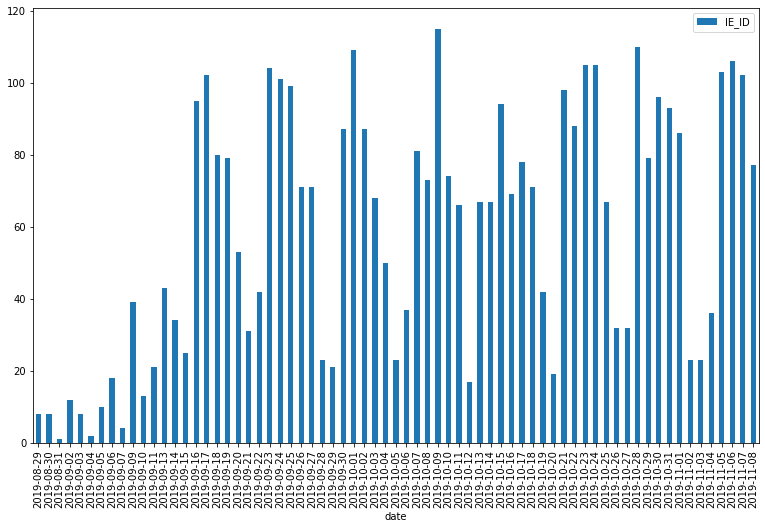

In [ ]:
import pandas as pd
from datetime import datetime
path = '/content/drive/MyDrive/p_t_it/export.csv'
dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M:%S')
df = pd.read_csv(path, sep=';', parse_dates=['IP_PROP5562'], date_parser=dateparse)
#df['IP_PROP5562'].map(lambda x: x.date())
pd.to_datetime(df['IP_PROP5562'], format='%d.%m.%Y %H:%S')
df['IP_PROP5562'].dt.date
df['date'] = df['IP_PROP5562'].map(lambda x: x.date())
df
df[['date', 'IE_ID']].groupby('date').count().plot(kind='bar', figsize=(13,8))

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/p_t_it/colab_notebooks/students.csv'
df = pd.read_csv(path)
def grants_count(col):
    return col[col > 3].count()

df.groupby(['Group']).aggregate({'Mark':[min, max, grants_count, 'count']}).rename(columns={'Mark': 'Средний балл'})
df.groupby(['Group']).mean().rename(columns={'Mark':'Средний балл'})
group = df.groupby(['Group']).aggregate({'Mark': [min, max, 'mean', grants_count, 'count']})
group.rename(columns={'min': 'Минимальный балл', 'max': 'Максимальный балл', 
                      'grants_count': 'Получат стипендию',
                      'mean':'Средний балл', 'count': 'Всего студентов'})

Mark                                                   \
      Минимальный балл Максимальный балл Средний балл Получат стипендию   
Group                                                                     
А                    3                 5     4.000000                 2   
Б                    4                 5     4.333333                 3   

                       
      Всего студентов  
Group                  
А                   3  
Б                   3

In [ ]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/p_t_it/data/StudentsPerformance.csv'
df = pd.read_csv(path)
df['cost'] = df[['math score', 'reading score', 'writing score']].mean(axis = 1)
par_lv = df[df.gender == 'female'].groupby(['parental level of education']).aggregate({'cost': 'mean'})
par_degree = par_lv.idxmax()[0]
answer = df[(df['parental level of education'] == par_degree) & (df.gender == 'male')].aggregate({'cost':'mean'})
answer
print(np.round(answer, 1))
# df.groupby(['gender', 'race/ethnicity'])['writing score'].mean()
# Какое среднее значение оценок по всем предметам у мальчиков 
# из такой же группы с уровнем образования как у родителей девочек, 
# получивших максимальную среднюю оценку по всем предметам?
#df
#data = df.groupby(['gender', 'parental level of education'])['writing score', 'reading score', 'math score'].mean()
#data
#np.mean([67.65454, 68.090909,	70.581818])

cost    68.8
dtype: float64


In [ ]:
# Для этого задания используется случайно генерируемая выборка из 100 записей об использовании велодорожек Монреаля по датам. В выгрузке присутствуют данные только о 7 дорожках 
# (в остальных пустые значения).

# Посчитайте среднюю посещаемость каждой велодорожки отдельно по дням недели.

# Какой день недели (в среднем) наиболее посещаем?

# Используйте английские названия дней недели:

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Учитывайте, что в конкретной случайной выборке наиболее популярным может стать не только любой день недели, но и любая велодорожка!

import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/p_t_it/data/dataset_345422_14 (3).txt'
df = pd.read_csv(path)
days[pd.to_datetime('2012-08-05').day_of_week]
df['day_of_week'] = df['Date'].map(lambda x: days[pd.to_datetime(x).day_of_week])
df_mean = df.groupby('day_of_week').mean()
df_mean.sum(axis=1).sort_values(ascending=False)

day_of_week
Thursday     18705.736842
Wednesday    16867.777778
Saturday     14796.000000
Sunday       14171.666667
Friday       13895.470588
Monday       12826.062500
Tuesday      11075.125000
dtype: float64

In [ ]:
# В файле football_players.csv представлен фрагмент выгрузки датасета о футболистах.

# Посчитайте среднюю и медианную зарплату "Wage" футболистов из разных клубов "Club".

# В скольких клубах средняя и медианная зарплаты совпадают?

import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/p_t_it/data/football_players.csv'
df = pd.read_csv(path)
[i for i in df]
df_wage = df[['Wage', 'Club']].groupby('Club').mean()
df_wage['Median'] = df[['Wage', 'Club']].groupby('Club').median()
df_wage
df_wage[df_wage.Median == df_wage.Wage].count()[0]

52

In [ ]:
# На основе датасета dataset_file_storage.csv урока Визуализация данных с помощью Seaborn:

# Посчитайте количество организаций (CompanyID), у которых суммарный объем файлов (FileSize) 
# хотя бы одного проекта (ProjectID) превышает средний объем файлов по всем проектам.
# Описание полей датасета:

# ProjectID (число) - id проекта в рамках которого загружен файл, привязка к элементам другой таблицы
# UserID (число) - id пользователя, загрузившего файл, привязка к элементам другой таблицы
# uploadServerUnixTime (число) - время загрузки файла на сервер в формате UnixTime
# CompanyID (число) - id организации которой принадлежит пользователь, привязка элемента другой таблицы
# FileSize (число) - размер файла в байтах
# TypeDocs (строка) - раздел в который загружен файл

import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/p_t_it/data/dataset_file_storage.csv'
df = pd.read_csv(path, sep=';')
file_size_mean = df['FileSize'].mean()
print(file_size_mean)
df.groupby(['CompanyID', 'ProjectID', 'FileSize'])
print(df[['FileSize', 'ProjectID']].groupby('ProjectID').sum('FileSize').mean())


13908581.279157666
FileSize    4.599767e+08
dtype: float64


# Нейронные сети курс

## numpy основы

In [ ]:
import numpy as np
a = np.array([[1,2,3], [4,5,6]])
print(a)
a.shape

[[1 2 3]
 [4 5 6]]


(2, 3)

In [ ]:
np.full((1000,10000),123)

array([[123, 123, 123, ..., 123, 123, 123],
       [123, 123, 123, ..., 123, 123, 123],
       [123, 123, 123, ..., 123, 123, 123],
       ...,
       [123, 123, 123, ..., 123, 123, 123],
       [123, 123, 123, ..., 123, 123, 123],
       [123, 123, 123, ..., 123, 123, 123]])

In [ ]:
# Создайте и напечатайте (с помощью функции print)
# массив класса np.ndarray ширины 4 и высоты 3 
# с двойками на главной диагонали и единицами на первой диагонали над главной

import numpy as np

a = np.eye(3, 4, 1)
b = np.eye(3, 4)*2
a + b

array([[2., 1., 0., 0.],
       [0., 2., 1., 0.],
       [0., 0., 2., 1.]])

In [ ]:
import random
w = np.array(random.sample(range(1000), 12))
w = w.reshape((2,2,3))
w.transpose(0, 2, 1)
w.reshape(12,1)

array([[425],
       [881],
       [202],
       [146],
       [ 65],
       [161],
       [381],
       [311],
       [240],
       [469],
       [189],
       [999]])

In [ ]:
# Задача: перемножьте две матрицы!

# На вход программе подаются две матрицы, 
# каждая в следующем формате: на первой строке 
# два целых положительных числа n и m, 
# разделенных пробелом - размерность матрицы. 
# В следующей строке находится n * m целых чисел, 
# разделенных пробелами - элементы матрицы. 
# Подразумевается, что матрица заполняется построчно, 
# то есть первые m чисел - первый ряд матрицы, числа от m+1 до 2*m - второй, и т.д.

import numpy as np
# a_shape = input().split()
# a = input().split()
# b_shape = input().split()
# b = input().split()
x_shape = tuple(map(int, input().split()))
X = np.fromiter(map(int, input().split()), int).reshape(x_shape)
y_shape = tuple(map(int, input().split()))
Y = np.fromiter(map(int, input().split()), int).reshape(y_shape)
Y = Y.transpose()
# if X.shape[1] == Y.shape[0]:
#     print(X.dot(Y))
# else:
#     print('matrix shapes do not match')

try:
    print(X.dot(Y))
except ValueError:
    print('matrix shapes do not match')


2 3
8 7 7 14 4 6
4 3
5 5 1 5 2 6 3 3 9 1 4 6
[[ 82  96 108  78]
 [ 96 114 108  66]]


In [ ]:
# Задача: считайте данные из файла и посчитайте их средние значения.

# На вход вашему решению будет подан адрес, 
# по которому расположен csv-файл, 
# из которого нужно считать данные. 
# Первая строчка в файле — названия столбцов, 
# остальные строки — числовые данные 
# (то есть каждая строка, кроме первой, 
#  состоит из последовательности вещественных чисел, 
#  разделённых запятыми).

import numpy as np

path = '/content/drive/MyDrive/p_t_it/data/boston_houses.csv'

np.loadtxt(path, usecols=(), skiprows=1, delimiter=',').mean(axis=0)

array([22.53280632,  3.61352356, 11.36363636,  0.06916996,  0.55469506,
        6.28463439,  3.79504269])

## линейная алгебра

In [ ]:
# https://stepik.org/lesson/18696/step/12?unit=4493
# У нас есть набор данных: знания о длине тормозного пути и скорости для трёх автомобилей.
# Напишите через запятую оценки коэффициентов линейной регрессии
# ​для модели с точностью до трёх знаков после точки.

import numpy as np

data0 = np.array([[10, 60], [7,50], [12,75]])
X = np.ones([3,2])
X[:, 1] = data0[:, 1]
y = np.array(data0[:, 0]).reshape(3,1)
step1 = X.T.dot(X)
step2 = np.linalg.inv(step1)
step3 = step2.dot(X.T)
b = step3.dot(y)
print(X, y, b, sep='\n')

[[ 1. 60.]
 [ 1. 50.]
 [ 1. 75.]]
[[10]
 [ 7]
 [12]]
[[-2.34210526]
 [ 0.19473684]]


In [ ]:
# https://stepik.org/lesson/18696/step/15?unit=4493
# Найдите оптимальные коэффициенты для построения линейной регрессии.
# Ваша задача — подсчитать вектор коэффициентов линейной регрессии для предсказания первой переменной 
# (первого столбца данных) по всем остальным. 
import numpy as np
path = '/content/drive/MyDrive/p_t_it/data/boston_houses.csv'#@param {type: "string"}
data = np.loadtxt(path, delimiter=',', skiprows=1)
data.shape
X = np.ones(data.shape)
X[:,1:] = data[:,1:]
y = np.array(data[:, 0])
# y = np.array(data0[:, 0]).reshape(3,1)
step1 = X.T.dot(X)
step2 = np.linalg.inv(step1)
step3 = step2.dot(X.T)
b = step3.dot(y)
print(b, sep=' ')

' '.join((map(str, b)))
# print(X, y, b, sep='\n')

[ -3.65580429  -0.2163955    0.0737306    4.41245058 -25.46844878
   7.14320155  -1.30108768]


'-3.655804285058417 -0.2163955023691392 0.07373059817548971 4.412450576912836 -25.46844878410251 7.143201550745909 -1.3010876776491929'

$$f(t) = \left\lbrace\begin{array}{t} 1,&\text{ если } t > 0, \\ 0 &\text{иначе}\end{array}\right.$$

In [ ]:
# https://stepik.org/lesson/21775/step/3?auth=login&unit=5191

import numpy as np

class Perceptron():
    def __init__(self, n=1, bias=0):
        self.weights = np.zeros(n)
        self.bias = bias

    def predict(self, vect):
        return (self.weights * vect).sum() + self.bias > 0
   
    def iter_learn(self, vect, answer):
        prediction = self.predict(vect)
        if prediction != answer:
            if prediction:
                self.weights -= vect
            else:
                self.weights += vect

x = Perceptron(2)
x.iter_learn(np.array([1.0, 0.3]), True)
x.iter_learn(np.array([0.4, 0.5]), True)
x.iter_learn(np.array([0.7, 0.8]), False)

x.bias, x.weights

(0, array([ 0.3, -0.5]))

In [ ]:
from math import exp
def tanh(x):
    return((exp(x)-exp(x*-1))/(exp(x)+exp(x*-1)))

tanh(0)

def sigm(x):
    return 1/(1+(exp(x*-1)))

def dtanh(x):
    return ((1 - exp(x-2))**2 * (-(exp(x-2)+1))**2) + 1

def dsigm(x):
    return (exp(-x)/(exp(-x)+1)**2)

for x in [1,-1]:
    print(f'{tanh(x)}, {dtanh(x)}, {sigm(x)}, {dsigm(x)}')

0.7615941559557649, 1.7476450724155086, 0.7310585786300049, 0.19661193324148188
-0.7615941559557649, 1.9950486398590204, 0.2689414213699951, 0.19661193324148185


## Практика

In [ ]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np
import random
import time

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, BoundedFloatText
from numpy.linalg import norm

random.seed(42)

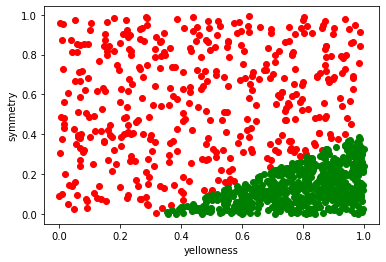

In [ ]:
%matplotlib inline
path = '/content/drive/MyDrive/p_t_it/colab_notebooks/nw_practice_1_data.csv'
data = np.loadtxt(path, delimiter=',')
pears = data[:, 2] == 1
apples = np.logical_not(pears)
plt.scatter(data[apples][:, 0], data[apples][:, 1], color = 'red')
plt.scatter(data[pears][:, 0], data[pears][:, 1], color = 'green')
plt.xlabel('yellowness')
plt.ylabel('symmetry')
plt.show()

In [ ]:
import numpy as np

class Perceptron:

    def __init__(self, w, b):
        """
        Инициализируем наш объект - перцептрон.
        w - вектор весов размера (m, 1), где m - количество переменных
        b - число
        """

        self.w = w
        self.b = b

    def forward_pass(self, single_input):
        """
        Метод рассчитывает ответ перцептрона при предъявлении одного примера
        single_input - вектор примера размера (m, 1).
        Метод возвращает число (0 или 1) или boolean (True/False)
        """

        result = 0
        for i in range(0, len(self.w)):
            result += self.w[i] * single_input[i]
        result += self.b

        if result > 0:
            return 1
        else:
            return 0

    def vectorized_forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        n - количество примеров, m - количество переменных
        Возвращает вертикальный вектор размера (n, 1) с ответами перцептрона
        (элементы вектора - boolean или целые числа (0 или 1))
        """
        # w = np.array(self.w)
        # input_matrix = np.array(input_matrix)
        # result_matrix = np.dot(input_matrix, w) + self.b
        # result_matrix[result_matrix < 0] = 0
        # return result_matrix.astype(dtype=bool)
        ## cool solution:
        return input_matrix.dot(self.w) > - self.b

    def train_on_single_example(self, example, y):
        """
        принимает вектор активации входов example формы (m, 1) 
        и правильный ответ для него (число 0 или 1 или boolean),
        обновляет значения весов перцептрона в соответствии с этим примером
        и возвращает размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        (на её основании мы потом построим интересный график)
        """

        ## Этот метод необходимо реализовать
        diff = y - self.vectorized_forward_pass(example.T)
        self.w += example * diff
        self.b += diff
        '''
        predict = float(np.dot(self.w.T, example) + self.b) > 0
        error = y-predict
        self.w = self.w + error * example
        self.b = self.b + error
        return error
        '''
    



w = np.array([-0,-0,0])
b = -100 
my_p = Perceptron(w, b)
matrix = np.array([
    [0,0,0],
    [1,2,3]
])
my_p.vectorized_forward_pass(matrix)

    

array([False, False])

In [ ]:
my_vect = Perceptron([-1, 2, 3], 0)
matrix = np.array([[1, 3, 4],[1,4,5],[3,5,6]])
my_vect.vectorized_forward_pass(matrix)

(array([0, 1, 2]),)

In [ ]:
2480.35/12

206.69583333333333

# Python начальный курс

In [ ]:
a = int(input())
print(a > 0)

3
True


In [ ]:
print (100 <= a < 0)

False


In [ ]:
x1, x2, x3 = False, True, False
((not x1) or x2) and x3

False

In [ ]:
x = 5
y = 10
y > x * x or y >= 2 * x and x < y

True

In [ ]:
a = True
b = False
a and b or not a and not b

False

## сапер
даны размеры поля для игры в сапер и координаты мин стоящих на этом поле.
Вывести поле игры на экран

In [ ]:
n, m, k = (int(i) for i in input().split())
a = [[0 for j in range(m)] for i in range(n)]
for i in range(k):
    row, col = (int(i) - 1 for i in input().split())
    a[row][col] = -1
for i in range(n):
    for j in range(m):
        if a[i][j] == 0:
            for di in range(-1, 2):  
                for dj in range(-1, 2):
                    ai = 1 + di
                    aj = j + dj
                    # (ai, aj)
                    if  0 <= ai < n and 0 <= aj < m and a[ai][aj] == -1:
                        a[i][j] += 1
for i in range(n):
    for j in range(m):
        if a[i][j] == -1:
            print('*', end='')
        elif a[i][j] == 0:
            print('.', end='')
        else:
            print(a[i][j], end='')
    print()
        

In [ ]:
# Напишите программу, которая считывает с консоли числа 
# (по одному в строке) до тех пор, 
# пока сумма введённых чисел не будет равна 0 
# и сразу после этого выводит сумму квадратов всех считанных чисел.
# Гарантируется, что в какой-то момент сумма введённых чисел 
# окажется равной 0, после этого считывание продолжать не нужно.
# В примере мы считываем числа 1, -3, 5, -6, -10, 13; 
# в этот момент замечаем, что сумма этих чисел равна нулю 
# и выводим сумму их квадратов, 
# не обращая внимания на то, что остались ещё не прочитанные значения.

# acc = []
# while True:
#     a = int(input())
#     acc.append(a)
#     if sum(acc) == 0:
#         break
# acc_out = []
# for i in acc:
#     acc_out.append(i*i)
# print(sum(acc_out))

s=[int(input())]
while sum(s)!=0: s.append(int(input()))
print(sum([i**2 for i in s]))


In [ ]:
# Напишите программу, 
# которая выводит часть последовательности 
# 1 2 2 3 3 3 4 4 4 4 5 5 5 5 5 ... 
# (число повторяется столько раз, чему равно). 
# На вход программе передаётся неотрицательное 
# целое число n — столько элементов последовательности 
# должна отобразить программа. На выходе ожидается 
# последовательность чисел, записанных через пробел в одну строку.
# Например, если n = 7, то программа должна вывести 1 2 2 3 3 3 4.

n = int(input())
m = 1
k = 1
out = []
while m <= n:
    for i in range(k):
        out.append(str(k))
        m+=1
        if m > n:
            break
    k+=1
print(' '.join(out))



7
1 2 2 3 3 3 4


In [ ]:
lst = [int(i) for i in input().split()]
x = int(input())
pos_lst = []
for k, i in enumerate(lst):
    if i == x:
        pos_lst.append(str(k))
if len(pos_lst) == 0:
    print('Отсутствует')
else:
    print(' '.join(pos_lst))

5 8 2 7 8 8 2 4
8
1 4 5


In [ ]:
# Напишите программу, на вход которой подаётся 
# прямоугольная матрица в виде последовательности строк. 
# После последней строки матрицы идёт строка, 
# содержащая только строку "end" (без кавычек, см. Sample Input).
# Программа должна вывести матрицу того же размера, 
# у которой каждый элемент в позиции i, j равен сумме
# элементов первой матрицы на позициях (i-1, j), (i+1, j), (i, j-1), (i, j+1). 
# У крайних символов соседний элемент находится с противоположной стороны матрицы.
# В случае одной строки/столбца элемент 
# сам себе является соседом по соответствующему направлению.
matrix0 = []
while True:
    a = input()
    if a == 'end':
        break
    else:
        matrix0.append([int(i) for i in a.split()])
matrix1 = [
            [0 for i in range(len(matrix0[0]))] 
                for i in range(len(matrix0))
          ]
for i in range(len(matrix0)):
    for j in range(len(matrix0[0])):
        if i == 0:
            i0 = len(matrix0) - 1
        elif i == len(matrix0) - 1:
            i0 = 0
        else:
            i0 = i
        if j == 0:
            j0 = len(matrix0[0]) - 1
        elif j0 == len(matrix0[0]) - 1:
            j0 = 0
        else:
            j0 = j
        matrix1[i][j] = matrix0[i0][j0] + \
                        matrix0[i0][j0] + \
                        matrix0[i0][j0] + \
                        matrix0[i0][j0]

for i in matrix1:
    print(i)


9 5 3
0 7 -1
-5 2 9
end


[[36, -20, 36], [-4, 0, -4], [12, 36, 12]]

In [ ]:
matrix1[4]

IndexError: ignored

# Решение задач на python

In [49]:
# На вход алгоритму подаётся строка, 
# содержащая символы латинского алфавита. 
# Эта строка разбивается на группы одинаковых символов, 
# идущих подряд ("серии"). Каждая серия характеризуется 
# повторяющимся символом и количеством повторений. 
# Именно эта информация и записывается в код:
#  сначала пишется длина серии повторяющихся символов, затем сам символ.
#   У серий длиной в один символ количество повторений будем опускать.

def codestring(text):
    stracc = ''
    start = 1
    before = text[0]
    for i in text[1:] + ' ':
        if i != before:
            if start > 1: stracc += str(start)
            stracc += before
            start = 1
            before = i
        else:
            start += 1
            before = i        
    print(stracc)

def codestring_series(text):
    start = 1
    before = text[0]
    list_acc = []
    for i in text[1:] + ' ':
        if i != before:
            list_acc.append((start, before))
            start = 1
            before = i
        else:
            start += 1
            before = i
    return list_acc

def codestring_series_generator(text):
    start = 1
    before = text[0]
    for i in text[1:] + ' ':
        if i != before:
            yield (start, before)
            start = 1
            before = i
        else:
            start += 1
            before = i

print(list(codestring_series_generator(input())))

KeyboardInterrupt: ignored

In [59]:
def cipher_caesar(shift, phrase):
    alphabet = ' abcdefghijklmnopqrstuvwxyz'   
    new_alphabet = [alphabet[(m+shift)%27] for m in range(27)]
    new_phrase = ''
    for i in phrase:
        new_phrase += new_alphabet[alphabet.index(i)]
    
    print(f'Result: "{new_phrase}"')

cipher_caesar(int(input()), input().strip())
        


3
i am caesar
Result: "lcdpcfdhvdu"


На вход программе подаётся строка, содержащая слова, разделённые пробелом. Программа должна вывести статистику длин слов в полученной строке, от меньшей длины слова к большей (см. пример).

Словом считается последовательность произвольных символов, окружённая пробелами либо границами строки. Заметьте, что знаки препинания также относятся к слову.

In [6]:
class Word_Counter_Sort():
    def __call__(self, text):
        str_list = text.split()
        str_list_num = [len(i) for i in str_list]
        d = {}
        for i in str_list_num:
            if i in d:
                d[i] += 1
            else:
                d[i] = 1

        for k, v in sorted(d.items()):
            print(k, v, sep=': ')

wcs = Word_Counter_Sort()
wcs('Beautiful is better than ugly. Explicit is better than implicit.')
        

2: 2
4: 2
5: 1
6: 2
8: 1
9: 2


In [21]:
%%timeit
#collatz

class Collatz():
    def __call__(self, num):
        print(num, end = ' ')
        while num != 1:
            if num%2 == 0: 
                num = num // 2
            else: 
                num = num * 3 + 1
            print(num, end=' ')

c = Collatz()
c(17)

17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40 20 10 5 16 8 4 2 1 17 52 26 13 40

На вход подаётся строка с выражением, состоящим из двух чисел, объединённых бинарным оператором: a  operator b, где вместо operator могут использоваться следующие слова: plus, minus, multiply, divide для, соответственно, сложения, вычитания, умножения и целочисленного деления.

In [30]:
class TextCalculator():
    
    def __init__(self):
        self.a = 1
        self.b = 1
        self.operation = 'plus'
        self.result = 0
    
    def ops(self):
        op_dict = {
            'plus':  self.a + self.b,
            'minus': self.a - self.b,
            'multiply': self.a * self.b,
            'divide': self.a / self.b
                }
        self.result = op_dict[self.operation]

    def __call__(self, txt_ops):
        list_ops = txt_ops.split()
        self.a = int(list_ops[0])
        self.b = int(list_ops[2])
        self.operation = list_ops[1]
        self.ops()
        return self.result


tc = TextCalculator()
tc(input())


45 plus 8


53

In [31]:
def t():
    print('true')
    return True

def f():
    print('false')
    return False

if t() and f():
    print('t and f')

if f() and t():
    print('f and t')

if t() or f():
    print('t or f')

if f() or t():
    print('f or t')

true
false
false
true
t or f
false
true
f or t


A durak deck contains 36 cards. Each card has a suit of either clubs, diamonds, hearts, or spades (denoted C, D, H, S). Each card also has a value of either 6 through 10, jack, queen, king, or ace (denoted 6, 7, 8, 9, 10, J, Q, K, A). For scoring purposes card values are ordered as above, with 6 having the lowest and ace the highest value.

Напишите программу, которая определяет, бьёт ли одна карта другую.
Если встречаются две карты одной масти, то побеждает та, у которой выше значение;
Если карты разных мастей, то карта, имеющая козырную масть, побеждает;
Если карты разных мастей и нет козырных, то никто не побеждает.

In [41]:
class Durak():
    def __init__(self, cards, trump):
        self.trump = trump
        self.cardA, self.cardB = [self.card(m) for m in cards.split()]

    suit = {
        'C': 'clubs',
        'D': 'diamonds',
        'H': 'hearts',
        'S': 'spades'
    }
    
    value = {
        '6': 6,
        '7': 7,
        '8': 8,
        '9': 9,
       '10': 10,
        'J': 11,
        'Q': 12,
        'K': 13,
        'A': 14
    }
    
    out = {
        'f': 'First',
        's': 'Second',
        'e': 'Error'
    }
    
    def card(self, txt_input):
        if len(txt_input) == 3:
            return (self.value['10'], txt_input[2])
        else:
            return (self.value[txt_input[0]], txt_input[1])
    
    def table(self):
        if self.cardA[0] > self.cardB[0]:
            if self.cardA[1] == self.cardB[1]:
                return self.out['f']
            elif self.cardA[1] == self.trump:
                return self.out['f']
            elif self.cardB[1] == self.trump:
                return self.out['s']
            else:
                return self.out['e']
        if self.cardA[0] < self.cardB[0]:
            if self.cardA[1] == self.cardB[1]:
                return self.out['s']
            elif self.cardA[1] == self.trump:
                return self.out['f']
            elif self.cardB[1] == self.trump:
                return self.out['s']
            else:
                return self.out['e']
        else:
            return self.out['e']
        

d = Durak(input(), input())
print(d.table())

10C 6C
C
First
